In [8]:
import pandas as pd
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np
from scipy.io import loadmat

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
import matplotlib as mpl
from matplotlib.patches import Circle
from matplotlib import patches

mpl.rcParams["figure.facecolor"] = "w"
mpl.rcParams["figure.dpi"] = 150
mpl.rcParams["savefig.dpi"] = 600
mpl.rcParams["savefig.transparent"] = True
mpl.rcParams["font.size"] = 15
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.sans-serif"] = ["Arial", "DejaVu Sans"]
mpl.rcParams["axes.titlesize"] = "xx-large"  # medium, large, x-large, xx-large

mpl.style.use("seaborn-deep")

In [13]:
humid_0217 = pd.read_csv('../data/humidity-and-temp/20220217/humid_20220217-20220225.txt',sep='\t',skiprows=7)
humid_0312 = pd.read_csv('../data/humidity-and-temp/20220312/humid_20220312-20220323.txt',sep='\t',skiprows=7)
humid_0326 = pd.read_csv('../data/humidity-and-temp/20220326/humid_20220326-20220406.txt',sep='\t',skiprows=7)
# humid_0409 = pd.read_csv('../data/humidity-and-temp/20220409/humid_20220409-20220418.txt',sep='\t',skiprows=7)
humid_0418 = pd.read_csv('../data/humidity-and-temp/20220418/humid_20220418-20220428.txt',sep='\t',skiprows=7)

In [14]:
list_of_humid = [humid_0217,humid_0312,humid_0326,humid_0418]
df = pd.concat([humid_0217,humid_0312,humid_0326,humid_0418],ignore_index=True)

In [15]:
for df in list_of_humid:
    df.loc[:,'datetime'] = pd.to_datetime(df.DATE.astype(str)+' '+df.TIME.astype(str))
    df.loc[:,'zeit'] = df.datetime.dt.hour + df.datetime.dt.minute/60
# df = df.drop(columns=['DATE', 'TIME'])

In [16]:
# df_long = pd.melt(df, id_vars=["zeit"], var_name="variable", value_name="value")
# df_long

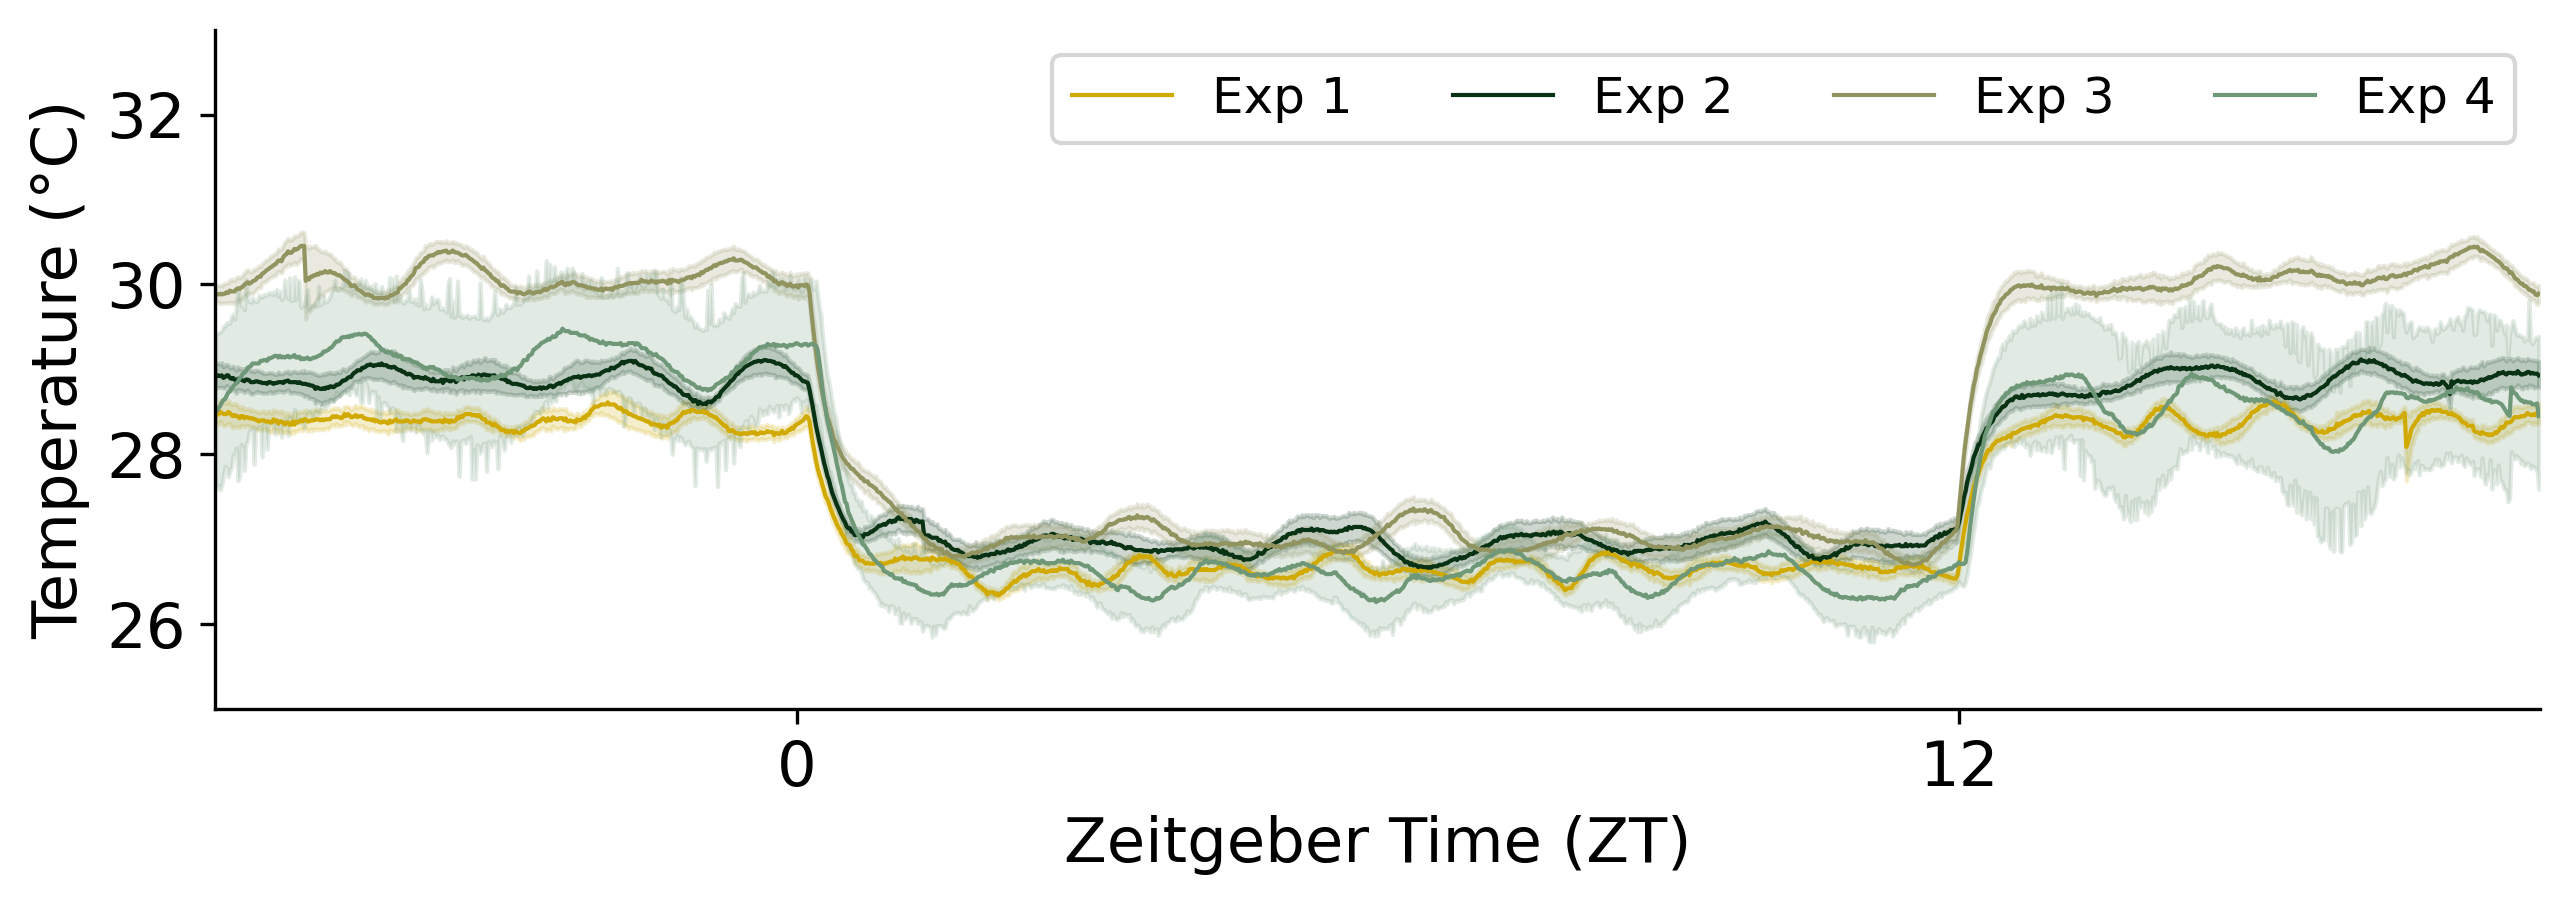

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
import palettable
plt.figure(figsize=(10, 3), dpi=300)
# plt.plot(df['datetime'], df['TEMPERATURE'], '-', color='black',zorder=-1)
# name_list = []
i=0
for df in list_of_humid:
    df.loc[:,'zeit'] = df.loc[:,'zeit'] = ((df.datetime.dt.hour +df.datetime.dt.minute/60) + 10) % 24
    if i in [0,1]:
        df.loc[:,'zeit'] = ((df.datetime.dt.hour +df.datetime.dt.minute/60) + 10) % 24
    else:
        df.loc[:,'zeit'] = ((df.datetime.dt.hour +df.datetime.dt.minute/60) + 9) % 24
    sns.lineplot(
        data=df,
        x="zeit", y="TEMPERATURE",
        lw=1, 
        color=palettable.wesanderson.Cavalcanti_5.mpl_colors[i],
        legend="brief",
        label = "Exp " + str((i+1)),
        ci=68)
    i = i +1
plt.xticks([6, 18], [0, 12])
plt.xlim(0,24)
plt.ylabel("Temperature (°C)")
plt.xlabel("Zeitgeber Time (ZT)")
sns.despine()
plt.legend(loc=0, fontsize=12,ncol=5)
plt.ylim(25,33)
plt.savefig('humidity-logger-temp.png', dpi=300)



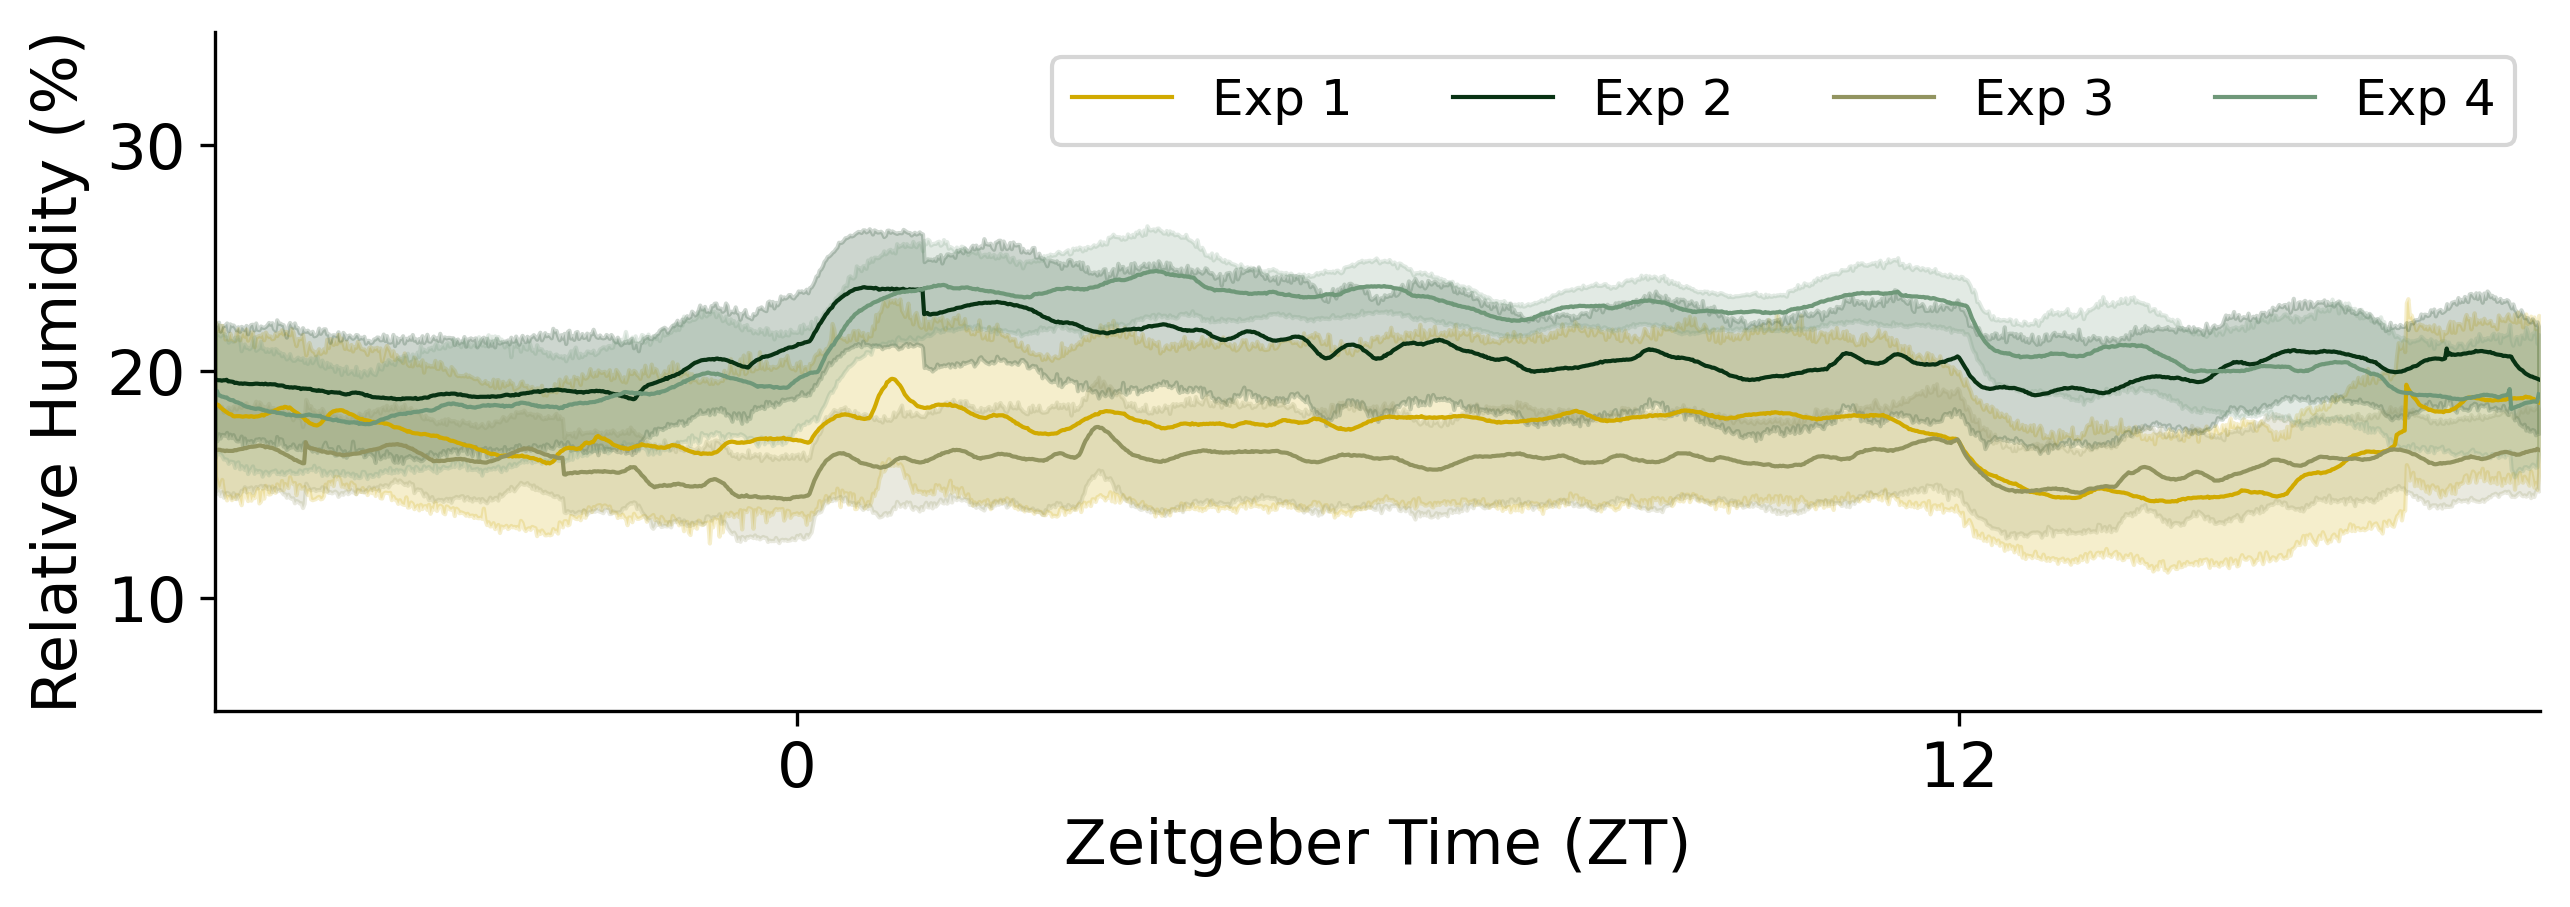

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
import palettable


plt.figure(figsize=(10,3), dpi=300)
# plt.plot(df['datetime'], df['TEMPERATURE'], '-', color='black',zorder=-1)
# name_list = []
i=0
for df in list_of_humid:
    if i in [0,1]:
        df.loc[:,'zeit'] = ((df.datetime.dt.hour +df.datetime.dt.minute/60) + 10) % 24
    else:
        df.loc[:,'zeit'] = ((df.datetime.dt.hour +df.datetime.dt.minute/60) + 9) % 24
    sns.lineplot(
        data=df,
        x="zeit", y="RELATIVE-HUMIDITY",
        lw=1, 
        color=palettable.wesanderson.Cavalcanti_5.mpl_colors[i],
        legend="brief",
        label = "Exp " + str(i+1),
        ci=68)
    i = i +1
plt.xlim(0,24)
plt.xticks([6, 18], [0, 12])
plt.ylabel("Relative Humidity (%)")
plt.xlabel("Zeitgeber Time (ZT)")
sns.despine()

plt.legend(loc=0, fontsize=12,ncol=5)
plt.ylim(5,35)
plt.savefig('humidity-logger-humidity.png', dpi=300)


In [22]:
temp_0217 = pd.read_csv('../data/humidity-and-temp/20220217/20220217.CSV', header=None,names=['date','time','temp_0','temp_1','line0','line1'])
temp_0312 = pd.read_csv('../data/humidity-and-temp/20220312/20220312.CSV', header=None,names=['date','time','temp_0','temp_1','line0','line1'])
temp_0326 = pd.read_csv('../data/humidity-and-temp/20220326/20220326.CSV', header=None,names=['date','time','temp_0','temp_1','line0','line1'])
# missing
temp_0418 = pd.read_csv('../data/humidity-and-temp/20220418/20220418.CSV', header=None,names=['date','time','temp_0','temp_1','line0','line1'])

In [23]:
fine_temp = pd.concat([temp_0217,temp_0312,temp_0326,temp_0418],ignore_index=True)
fine_temp_dfs = [temp_0217,temp_0312,temp_0326,temp_0418]


0
1
2
3


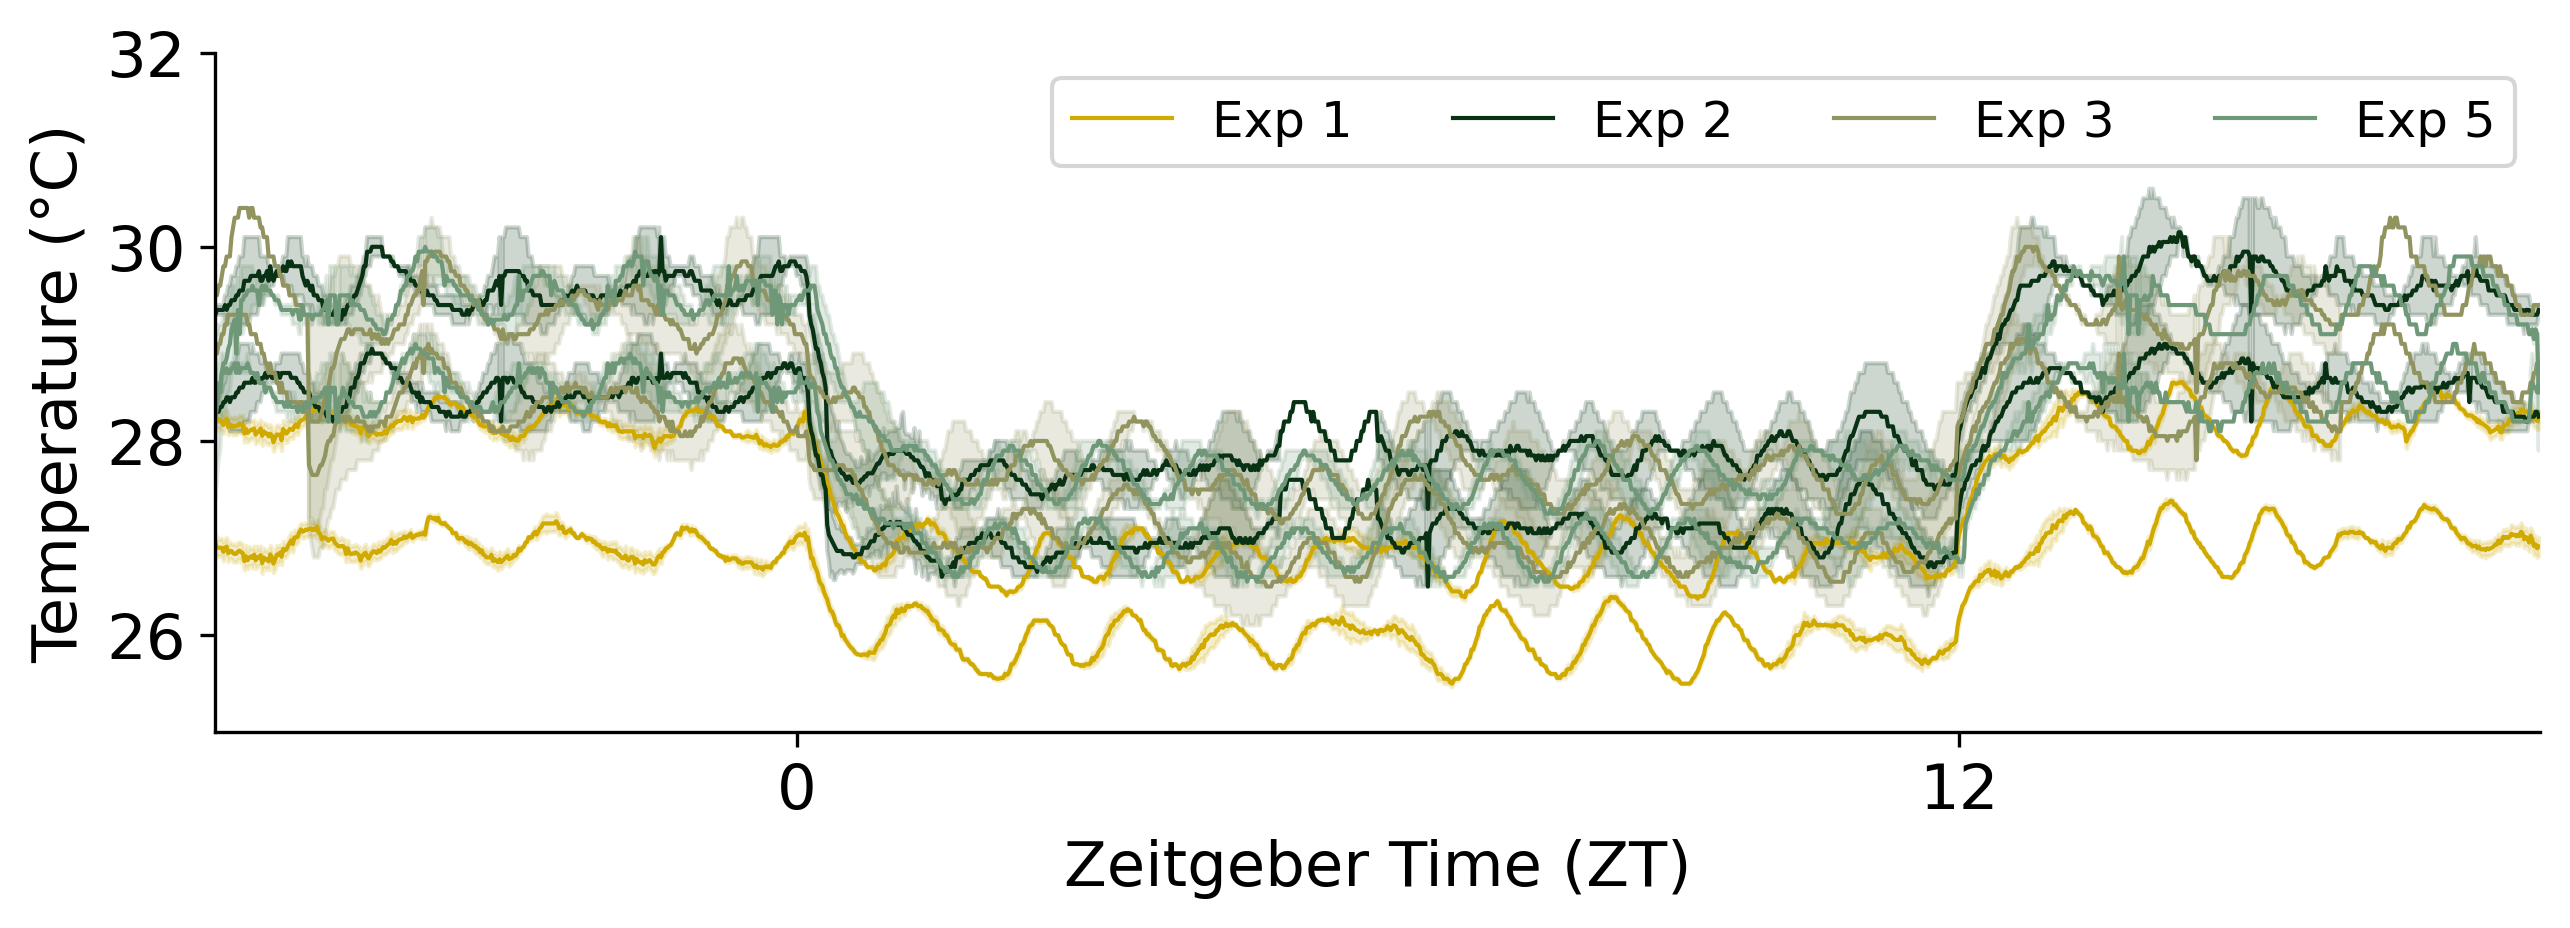

In [28]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
import palettable
plt.figure(figsize=(10, 3), dpi=300)
# plt.plot(df['datetime'], df['TEMPERATURE'], '-', color='black',zorder=-1)
# name_list = []
i=0
expmts = [1,2,3,5]
for df in fine_temp_dfs:
    df.loc[:,'datetime'] = pd.to_datetime(df.date.astype(str)+' '+df.time.astype(str))
    if i in [0]:
        df.loc[:,'zeit'] = ((df.datetime.dt.hour +df.datetime.dt.minute/60) + 10) % 24
    else:
        df.loc[:,'zeit'] = ((df.datetime.dt.hour +df.datetime.dt.minute/60) + 9) % 24
    mask_0 = df['temp_0'] < 31
    mask_1 =  df['temp_1'] < 31
    df =df.where(mask_0 & mask_1)
    print(i)
    sns.lineplot(
        data=df,
        x="zeit", y="temp_0",
        lw=1, 
        color=palettable.wesanderson.Cavalcanti_5.mpl_colors[i],
        legend="brief",
        label = "Exp " + str(expmts[i]),
        ci=68)
    sns.lineplot(
        data=df,
        x="zeit", y="temp_1",
        lw=1, 
        color=palettable.wesanderson.Cavalcanti_5.mpl_colors[i],
        legend="brief",
        ci=68)
        # label = "Exp " + str((i+1)))
    i = i +1
plt.xlim(0,24)
plt.xticks([6, 18], [0, 12])
plt.ylabel("Temperature (°C)")
plt.xlabel("Zeitgeber Time (ZT)")
sns.despine()
plt.legend(loc=0, fontsize=12,ncol=5)
plt.ylim(25,32)
plt.savefig('20220217_humidtemp_temperature.png', dpi=300)

: 